https://habr.com/ru/post/491612/


#Сравнение динамики котировок двух акций на python на примере привилегированных и обычных акций Сбербанка

В данном примере мы будем скачивать котировки с сайта Финама. Ссылка для скачивания обычного Сбербанка.

Для операций со столбцами буду использовать pandas, для визуализации matplotlib.

Импортируем:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Чтобы таблицы не сокращались, необходимо убрать ограничения:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 80)
pd.set_option('max_rows', 6000)

In [19]:
#Читаем данные по акции
df = pd.read_csv("SBER_180101_230307.csv",sep=';', header=0, index_col='<DATE>', parse_dates=True)
#(указываем разделитель, где находятся название столбцов, какой столбец будет индексом, включаем парсинг дат).

In [20]:
#Также укажем сортировку:
df = df.sort_values(by='<DATE>')

In [21]:
print(df)

           <TICKER> <PER>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>       <VOL>
<DATE>                                                                        
2018-01-03     SBER     D       0  226.88  232.70  226.35   231.90    34460110
2018-01-04     SBER     D       0  232.13  239.50  231.00   238.80    53575900
2018-01-05     SBER     D       0  238.85  239.95  236.70   238.60    31546930
2018-01-09     SBER     D       0  239.04  243.76  239.01   240.40    53158280
2018-01-10     SBER     D       0  240.41  241.25  237.06   237.76    39353510
2018-01-11     SBER     D       0  237.76  240.88  235.21   239.00    43062100
2018-01-12     SBER     D       0  239.00  239.00  236.05   237.75    30886330
2018-01-15     SBER     D       0  239.03  240.97  238.00   238.85    25651360
2018-01-16     SBER     D       0  239.00  240.00  236.01   239.64    25463890
2018-01-17     SBER     D       0  238.62  239.82  236.53   239.82    30496560
2018-01-18     SBER     D       0  240.50  246.69  2

In [22]:
#Добавляем столбец с изменением цены
df['returns']=(df['<CLOSE>']/df['<CLOSE>'].shift(1))-1

In [23]:
print(df)

           <TICKER> <PER>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>       <VOL>   returns
<DATE>                                                                                  
2018-01-03     SBER     D       0  226.88  232.70  226.35   231.90    34460110       NaN
2018-01-04     SBER     D       0  232.13  239.50  231.00   238.80    53575900  0.029754
2018-01-05     SBER     D       0  238.85  239.95  236.70   238.60    31546930 -0.000838
2018-01-09     SBER     D       0  239.04  243.76  239.01   240.40    53158280  0.007544
2018-01-10     SBER     D       0  240.41  241.25  237.06   237.76    39353510 -0.010982
2018-01-11     SBER     D       0  237.76  240.88  235.21   239.00    43062100  0.005215
2018-01-12     SBER     D       0  239.00  239.00  236.05   237.75    30886330 -0.005230
2018-01-15     SBER     D       0  239.03  240.97  238.00   238.85    25651360  0.004627
2018-01-16     SBER     D       0  239.00  240.00  236.01   239.64    25463890  0.003308
2018-01-17     SBER  

In [24]:
#Так можно выводить именно процент:
df['returns_pers']=((df['<CLOSE>']/df['<CLOSE>'].shift(1))-1)*100


In [25]:
print(df)

           <TICKER> <PER>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>       <VOL>   returns  returns_pers
<DATE>                                                                                                
2018-01-03     SBER     D       0  226.88  232.70  226.35   231.90    34460110       NaN           NaN
2018-01-04     SBER     D       0  232.13  239.50  231.00   238.80    53575900  0.029754      2.975420
2018-01-05     SBER     D       0  238.85  239.95  236.70   238.60    31546930 -0.000838     -0.083752
2018-01-09     SBER     D       0  239.04  243.76  239.01   240.40    53158280  0.007544      0.754401
2018-01-10     SBER     D       0  240.41  241.25  237.06   237.76    39353510 -0.010982     -1.098170
2018-01-11     SBER     D       0  237.76  240.88  235.21   239.00    43062100  0.005215      0.521534
2018-01-12     SBER     D       0  239.00  239.00  236.05   237.75    30886330 -0.005230     -0.523013
2018-01-15     SBER     D       0  239.03  240.97  238.00   238.85    256

Добавляем вторую акцию

In [33]:
df2 = pd.read_csv("SBERP_180101_230307 (1).csv",sep=';', header=0, index_col='<DATE>', parse_dates=True)

In [34]:
#Делаем это точно таким же образом
#df2 = pd.read_csv("SBERP_180101_230307.csv",sep=';', header=0, index_col='<DATE>', parse_dates=True)

df = df.sort_values(by='<DATE>')

df2['returns_pers']=((df2['<CLOSE>']/df2['<CLOSE>'].shift(1))-1)*100
df2['returns']=(df2['<CLOSE>']/df2['<CLOSE>'].shift(1))-1
print(df2)

           <TICKER> <PER>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>      <VOL>  returns_pers   returns
<DATE>                                                                                               
2018-01-03    SBERP     D       0  190.66  197.40  190.47   197.30    3231300           NaN       NaN
2018-01-04    SBERP     D       0  197.99  204.40  197.01   203.03    4334900      2.904207  0.029042
2018-01-05    SBERP     D       0  204.02  205.88  203.03   203.50    4082400      0.231493  0.002315
2018-01-09    SBERP     D       0  203.91  205.93  200.37   201.30    3860100     -1.081081 -0.010811
2018-01-10    SBERP     D       0  201.99  202.42  196.16   197.52    4842300     -1.877794 -0.018778
2018-01-11    SBERP     D       0  197.82  199.91  196.00   199.78    3314900      1.144188  0.011442
2018-01-12    SBERP     D       0  199.77  200.90  198.21   199.49    2496000     -0.145160 -0.001452
2018-01-15    SBERP     D       0  200.00  203.44  200.00   201.90    3256400     

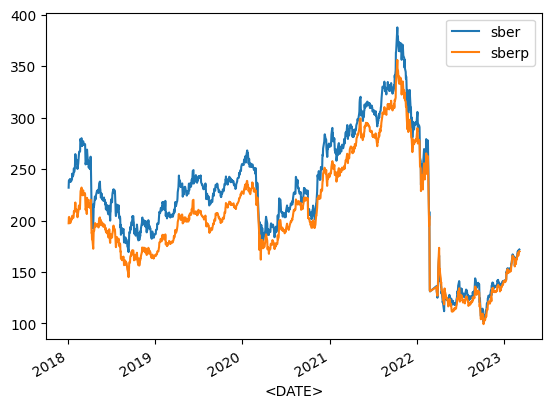

In [37]:
#Визуализируем котировки наших акций
df['<CLOSE>'].plot(label='sber')
df2['<CLOSE>'].plot(label='sberp')
plt.legend()
plt.show()

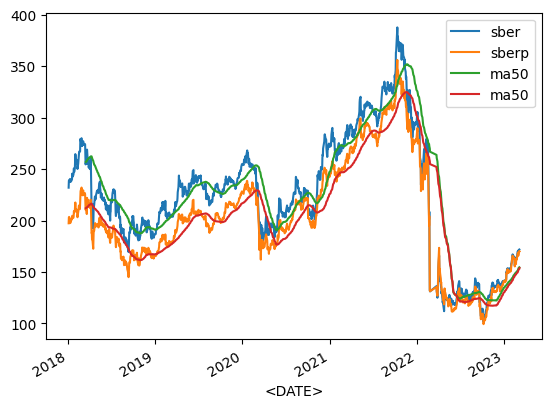

In [38]:
#Теперь отобразим котировки с их средними (MA 50):
df['<CLOSE>'].plot(label='sber')
df2['<CLOSE>'].plot(label='sberp')
df['ma50'] = df['<OPEN>'].rolling(50).mean().plot(label='ma50')
df2['ma50'] = df2['<OPEN>'].rolling(50).mean().plot(label='ma50')
plt.legend()
plt.show()

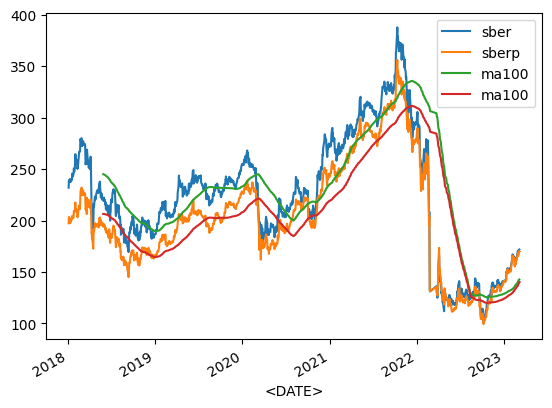

In [39]:
#Можно отобразить и другие средние
df['<CLOSE>'].plot(label='sber')
df2['<CLOSE>'].plot(label='sberp')
df['ma100'] = df['<OPEN>'].rolling(100).mean().plot(label='ma100')
df2['ma100'] = df2['<OPEN>'].rolling(100).mean().plot(label='ma100')
plt.legend()
plt.show()

Теперь выведем оборот по акциям:
Добавим также название оси У
и размер холст

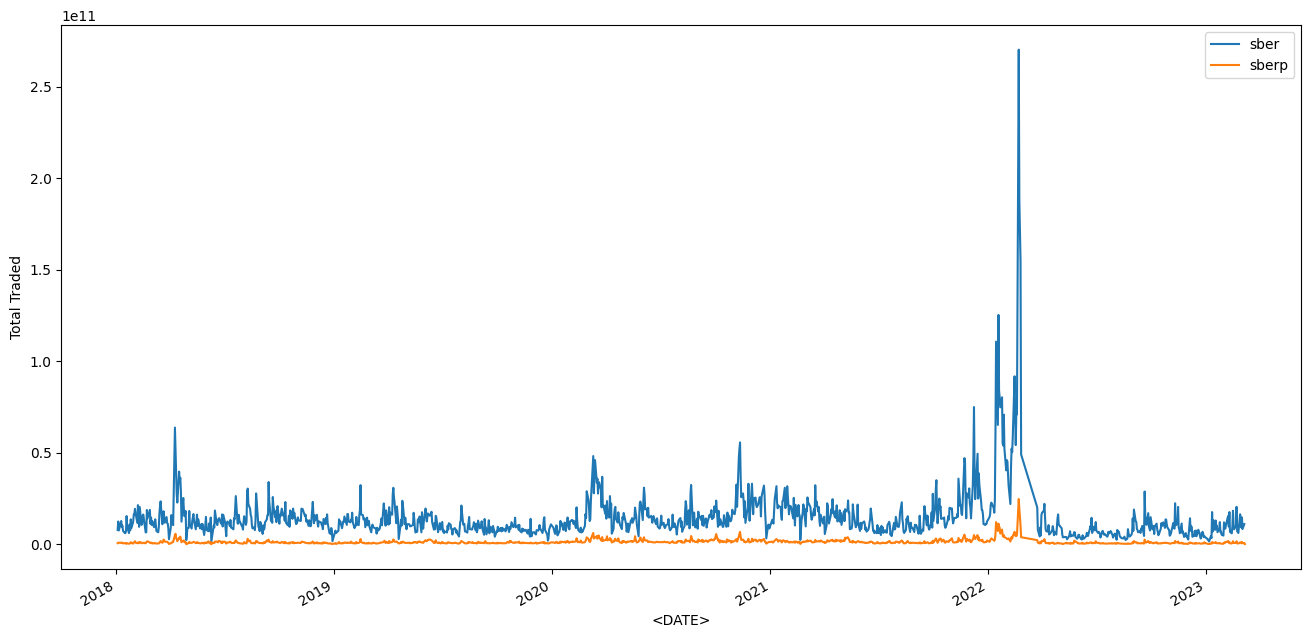

In [40]:
df['total_trade'] = df['<OPEN>']*df['<VOL>']
df2['total_trade'] = df2['<OPEN>']*df2['<VOL>']
df['total_trade'].plot(label='sber',figsize=(16,8))
df2['total_trade'].plot(label='sberp',figsize=(16,8))
plt.legend()
plt.ylabel('Total Traded')
plt.show()

Анализ корреляций


Теперь подробнее посмотрим на корреляцию. в этом нам поможет матричный график

Создадим новую таблицу с колонками по обеим акциям и зададим им названия

In [41]:
all_sber = pd.concat([df['<OPEN>'],df2['<OPEN>']],axis=1)
all_sber.columns = ['sber_open','sberp_open']
print(all_sber)

            sber_open  sberp_open
<DATE>                           
2018-01-03     226.88      190.66
2018-01-04     232.13      197.99
2018-01-05     238.85      204.02
2018-01-09     239.04      203.91
2018-01-10     240.41      201.99
2018-01-11     237.76      197.82
2018-01-12     239.00      199.77
2018-01-15     239.03      200.00
2018-01-16     239.00      203.34
2018-01-17     238.62      199.50
2018-01-18     240.50      201.34
2018-01-19     245.16      204.50
2018-01-22     242.97      203.96
2018-01-23     244.78      203.72
2018-01-24     244.20      202.71
2018-01-25     247.90      205.48
2018-01-26     249.60      208.40
2018-01-29     247.50      208.87
2018-01-30     248.53      208.99
2018-01-31     257.50      213.40
2018-02-01     265.00      218.49
2018-02-02     263.63      214.38
2018-02-05     254.93      207.36
2018-02-06     249.98      205.01
2018-02-07     263.00      212.23
2018-02-08     256.40      208.80
2018-02-09     249.48      203.50
2018-02-12    

In [42]:
#Теперь импортируем нужный график
from pandas.plotting import scatter_matrix

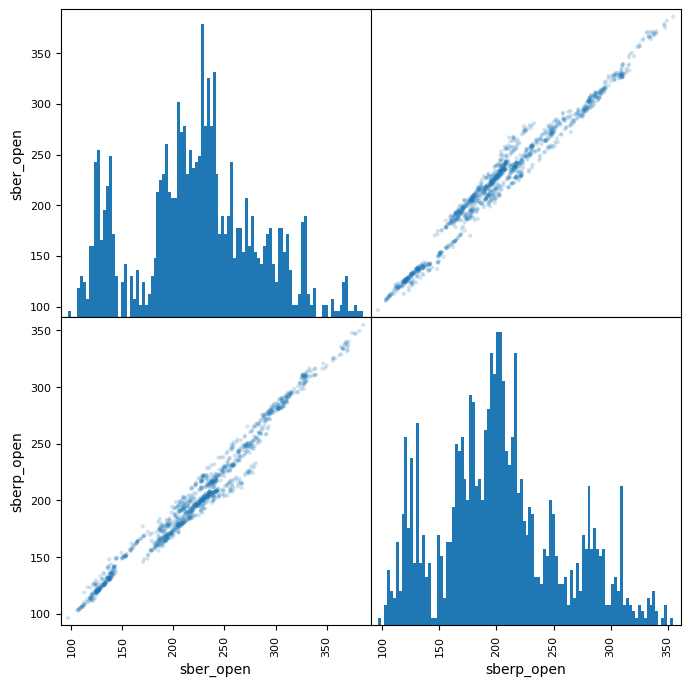

In [44]:
#И выведем его:
scatter_matrix(all_sber,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});
plt.show()
#Следует уточнить, что нам нужно добавить прозрачность (alpha=0,2), чтобы видеть наложение точек


Если точки “идут” по диагонали, наблюдается корреляция.

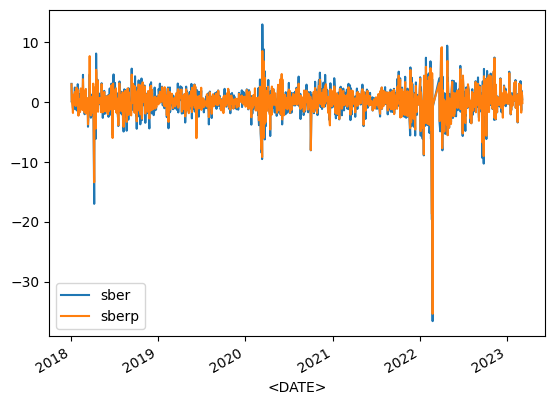

In [45]:
#Оценка волатильности бумаг
df['returns_pers'].plot(label='sber')
df2['returns_pers'].plot(label='sberp')
plt.legend()
plt.show()

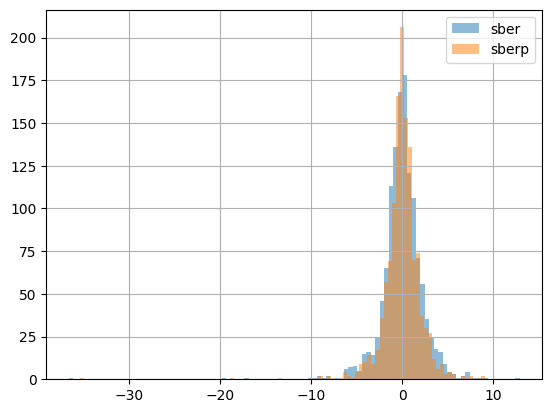

In [46]:
#Для лучшего понимания Отобразим волатильность на другом графике — гистограмме
df['returns_pers'].hist(bins=100,label='sber',alpha=0.5)
df2['returns_pers'].hist(bins=100,label='sberp',alpha=0.5)
plt.legend()
plt.show()

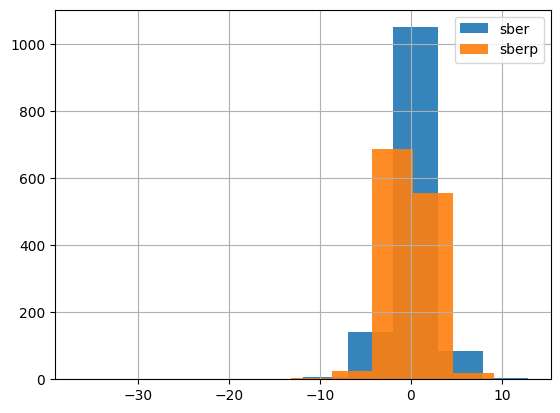

In [47]:
#Чтобы сделать вывод быстрее, можно упростить график (сделаем график менее подробным и менее прозрачным):
df['returns_pers'].hist(bins=10,label='sber',alpha=0.9)
df2['returns_pers'].hist(bins=10,label='sberp',alpha=0.9)
plt.legend()
plt.show()

Анализ накопленного дохода

Теперь выведем изменение стоимости акций в процентах.

Для этого введем столбец с накопленным доходом.

           <TICKER> <PER>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>       <VOL>   returns  returns_pers                               ma50                              ma100   total_trade  Cumulative Return
<DATE>                                                                                                                                                                                                       
2018-01-03     SBER     D       0  226.88  232.70  226.35   231.90    34460110       NaN           NaN  AxesSubplot(0.125,0.2;0.775x0.68)  AxesSubplot(0.125,0.2;0.775x0.68)  7.818310e+09                NaN
2018-01-04     SBER     D       0  232.13  239.50  231.00   238.80    53575900  0.029754      2.975420  AxesSubplot(0.125,0.2;0.775x0.68)  AxesSubplot(0.125,0.2;0.775x0.68)  1.243657e+10           1.029754
2018-01-05     SBER     D       0  238.85  239.95  236.70   238.60    31546930 -0.000838     -0.083752  AxesSubplot(0.125,0.2;0.775x0.68)  AxesSubplot(0.125,0.2;0.775x0.68)  7.

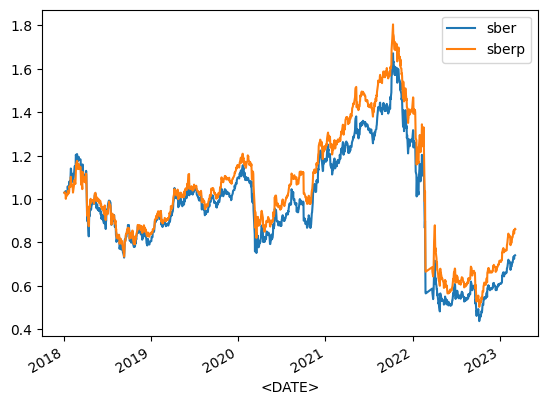

In [48]:
df['Cumulative Return'] = (1+ df['returns']).cumprod()
df2['Cumulative Return'] = (1+ df2['returns']).cumprod()
print(df)
print(df2)

df['Cumulative Return'].plot(label='sber')
df2['Cumulative Return'].plot(label='sberp')
plt.legend()
plt.show()

На графиках мы можем увидеть временные промежутки, когда одна из акций недооценена или переоценена относительно другой. В текущих обстоятельствах (при прочих равных, прошу заметить) нам это поможет выбрать акцию для усреднения при падении капитализации Сбербанка.